In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif,SelectKBest,VarianceThreshold
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
round(data.describe(),1)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.5,15690940.6,650.5,38.9,5.0,76485.9,1.5,0.7,0.5,100090.2,0.2
std,2886.9,71936.2,96.7,10.5,2.9,62397.4,0.6,0.5,0.5,57510.5,0.4
min,1.0,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,11.6,0.0
25%,2500.8,15628528.2,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.1,0.0
50%,5000.5,15690738.0,652.0,37.0,5.0,97198.5,1.0,1.0,1.0,100193.9,0.0
75%,7500.2,15753233.8,718.0,44.0,7.0,127644.2,2.0,1.0,1.0,149388.2,0.0
max,10000.0,15815690.0,850.0,92.0,10.0,250898.1,4.0,1.0,1.0,199992.5,1.0


## Data Explorartory Analysis

### Exited Customer Analysis.

In [16]:
colors = ['lightblue', 'lightsteelblue']

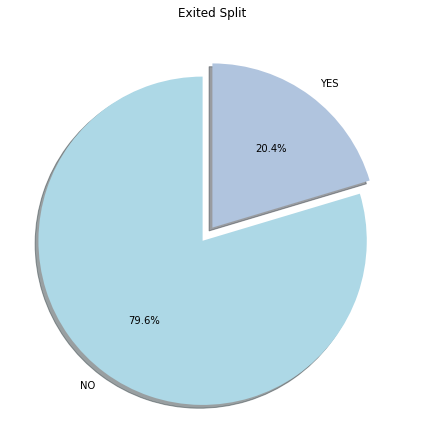

Here,can see the Exited Customer is around 20 % and Not-Exited Customer is around 79%


In [17]:
plt.figure(figsize=(6,6))
plt.pie(data['Exited'].value_counts(),labels=['NO','YES'],startangle=90,explode=(0.1,0),autopct='%1.1f%%',shadow=True,colors=colors)
plt.tight_layout()
plt.title('Exited Split')
plt.show()
print("Here,can see the Exited Customer is around 20 % and Not-Exited Customer is around 79%")

### Analysis over the Gender.

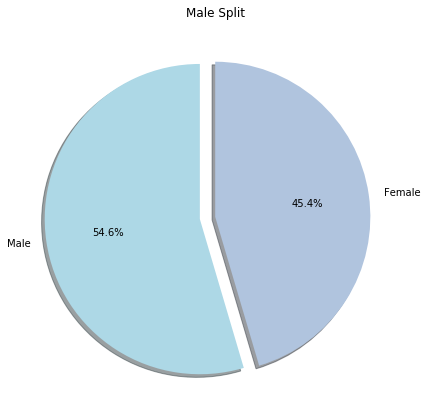

Here,can see the  Customer with MALE is around 54 % and FEMALE Customer is around 45%


In [18]:
plt.figure(figsize=(6,6))
plt.pie(data['Gender'].value_counts(),labels=['Male','Female'],startangle=90,explode=(0.1,0),autopct='%1.1f%%',shadow=True,colors=colors)
plt.tight_layout()
plt.title('Male Split')
plt.show()
print("Here,can see the  Customer with MALE is around 54 % and FEMALE Customer is around 45%")

In [19]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
colors =['green','red','yellow']

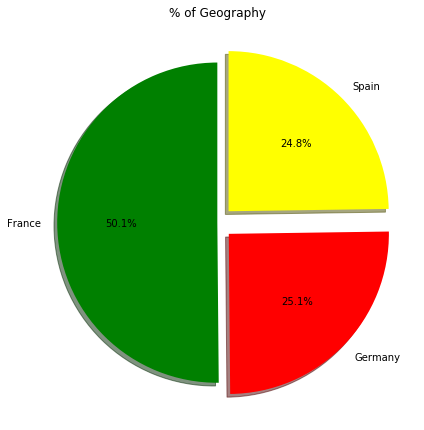

Here,We can see thhe e 50% people from the Spain and 25% from the Germany  and 24% from the Spain.


In [21]:
plt.figure(figsize=(6,6))
plt.pie(data['Geography'].value_counts(),labels=['France','Germany','Spain'],explode=[0,0.1,0.1],colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.tight_layout()
plt.title('% of Geography')
plt.show()
print("Here,We can see thhe e 50% people from the Spain and 25% from the Germany  and 24% from the Spain.")

#### Plot accross EstimatedSalary vs Exited.

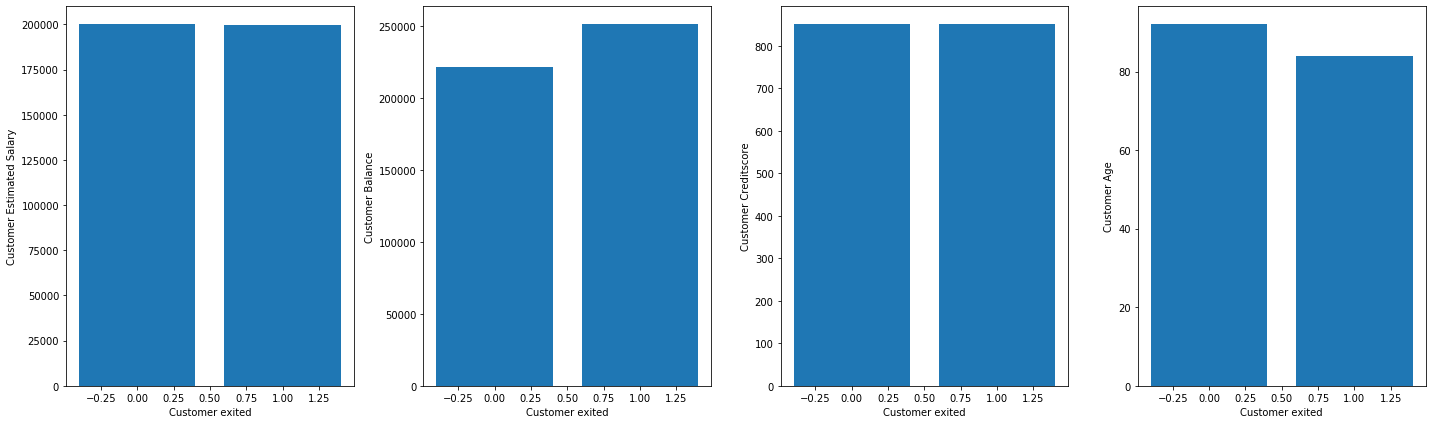

In [22]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace=5)
plt.subplot(141)
plt.bar(data['Exited'],data['EstimatedSalary'])
plt.xlabel('Customer exited')
plt.ylabel('Customer Estimated Salary')
plt.subplot(142)
plt.bar(data['Exited'],data['Balance'])
plt.xlabel('Customer exited')
plt.ylabel('Customer Balance')
plt.subplot(143)
plt.bar(data['Exited'],data['CreditScore'])
plt.xlabel('Customer exited')
plt.ylabel('Customer Creditscore')
plt.subplot(144)
plt.bar(data['Exited'],data['Age'])
plt.xlabel('Customer exited')
plt.ylabel('Customer Age')
plt.tight_layout()
plt.show()

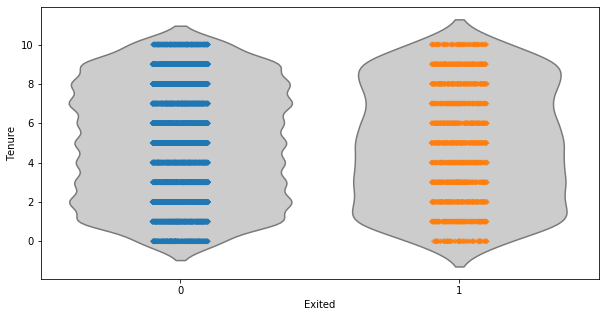

In [23]:
plt.subplots(figsize=(10,5))

g = sns.violinplot(x='Exited',y='Tenure',data=data,inner=None,color='0.8')
sns.stripplot(x="Exited", y="Tenure", data=data, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray",ax=g)
plt.show()

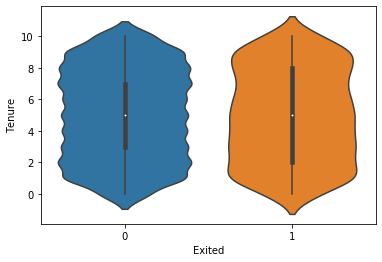

In [24]:
sns.violinplot(data['Exited'],data['Tenure'],dodge=True)
plt.show()

- As we can see in the first chart, the bars are highest at 10 months & then less than 10 months. This may mean that most customers who stay with the company are either new ones or ones that have been with the company for around 1 year, i.e their most loyal customers.

In [25]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


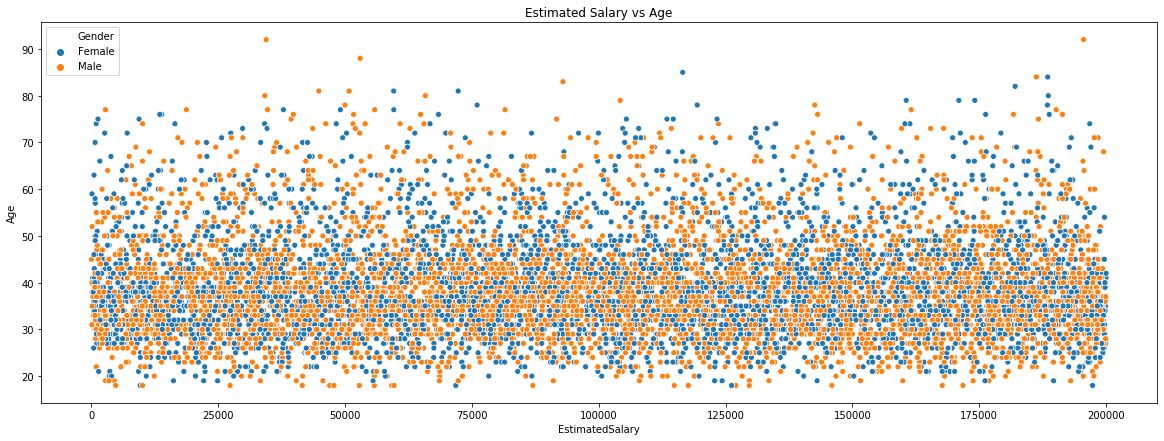

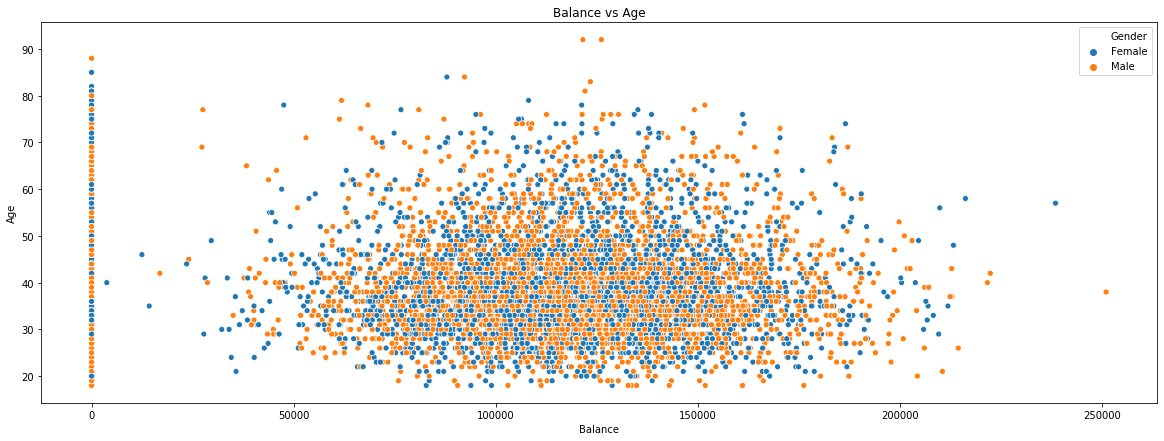

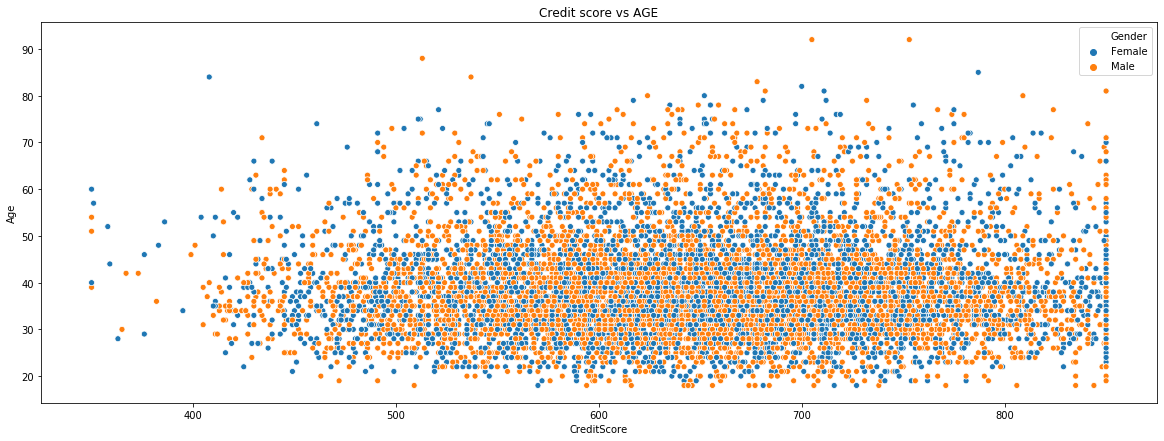

In [26]:
plt.figure(figsize=(20,7))
sns.scatterplot(data['EstimatedSalary'],data['Age'],hue=data['Gender'])
plt.title('Estimated Salary vs Age')
plt.show()
plt.figure(figsize=(20,7))
sns.scatterplot(data['Balance'],data['Age'],hue=data['Gender'])
plt.title('Balance vs Age')
plt.show()
plt.figure(figsize=(20,7))
sns.scatterplot(data['CreditScore'],data['Age'],hue=data['Gender'])
plt.title('Credit score vs AGE')
plt.show()

In [27]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


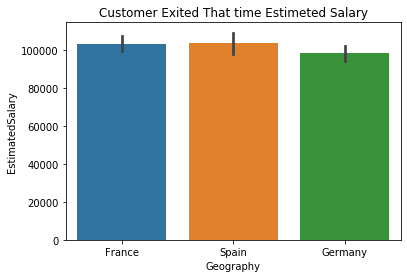

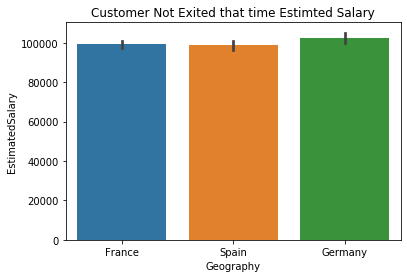

In [28]:
sns.barplot(data['Geography'],data[data['Exited']==1]['EstimatedSalary'])
plt.title('Customer Exited That time Estimeted Salary')
plt.show()
sns.barplot(data['Geography'],data[data['Exited']==0]['EstimatedSalary'])
plt.title('Customer Not Exited that time Estimted Salary')
plt.show()

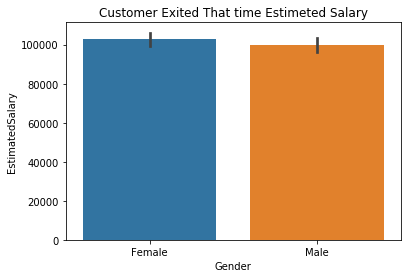

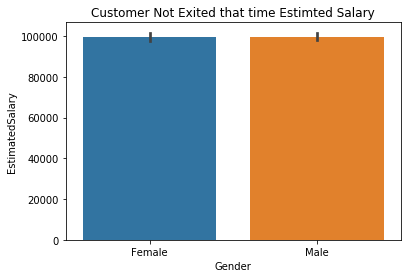

In [29]:
sns.barplot(data['Gender'],data[data['Exited']==1]['EstimatedSalary'])
plt.title('Customer Exited That time Estimeted Salary')
plt.show()
sns.barplot(data['Gender'],data[data['Exited']==0]['EstimatedSalary'])
plt.title('Customer Not Exited that time Estimted Salary')
plt.show()

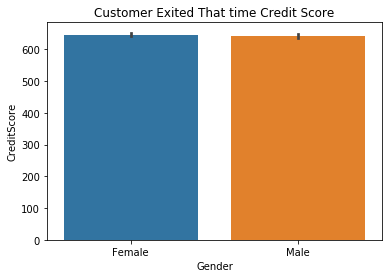

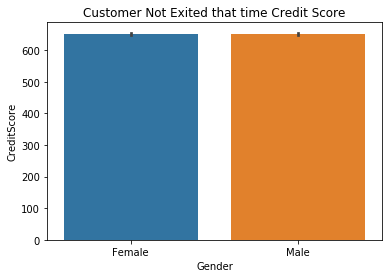

In [30]:
sns.barplot(data['Gender'],data[data['Exited']==1]['CreditScore']) 
plt.title('Customer Exited That time Credit Score')
plt.show()
sns.barplot(data['Gender'],data[data['Exited']==0]['CreditScore'])
plt.title('Customer Not Exited that time Credit Score')
plt.show()

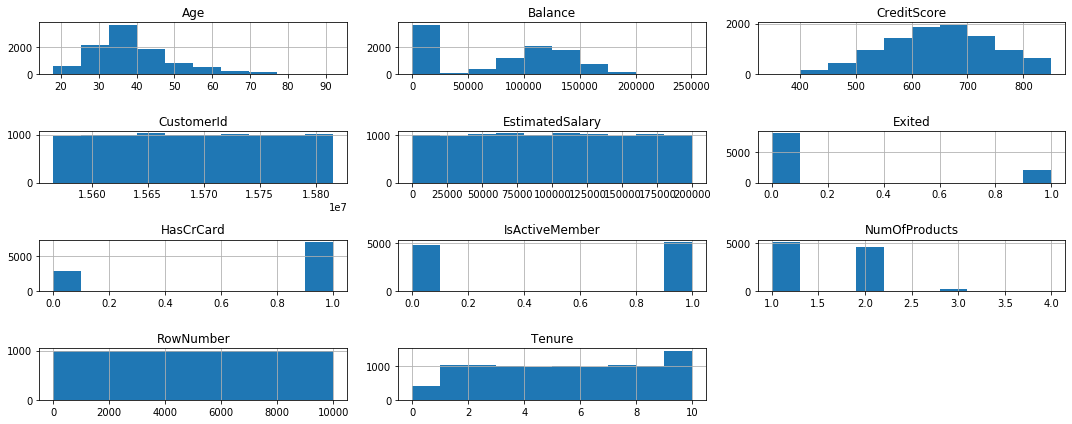

In [31]:
fig,ax=plt.subplots(figsize=(15,6))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

In [32]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
len(data['Geography'].value_counts())

3

In [34]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Data Preprocessing.

In [35]:
df = pd.get_dummies(data['Geography'],drop_first=True)

In [36]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [37]:
dff = pd.get_dummies(data['Gender'],drop_first=True)

In [38]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [39]:
df1 = pd.concat([df,dff],axis=1)

In [40]:
data1 = pd.concat([data,df1],axis=1)

In [41]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [42]:
data1.drop(columns=['Geography','Gender'],inplace=True)

In [43]:
data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [44]:
corrmat = data1.corr()
corrmat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


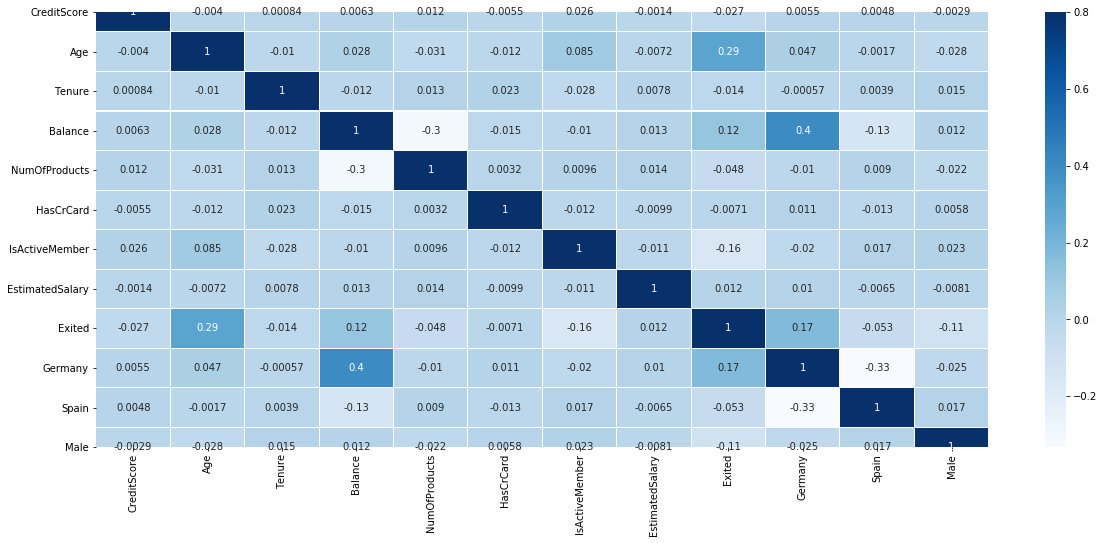

In [45]:
plt.figure(figsize=(20,8))
sns.heatmap(corrmat,linewidths=0.1,vmax=0.8,linecolor='white',cmap=plt.cm.Blues,annot=True)
plt.show()

### Data Preprocessing, Feature Selection & Feature Importance

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
x = data1.drop(columns=['Exited'])
y = data1['Exited']

In [48]:
x.shape,y.shape

((10000, 11), (10000,))

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [50]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

#### Make the Imbalance datasets to Balance datasets.

In [51]:
print('1 in y_train :',len(y_train[y_train==1]))
print('0 in y_train :',len(y_train[y_train==0]))

1 in y_train : 1630
0 in y_train : 6370


In [52]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [53]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [54]:
x_train_res,y_train_res = sm.fit_sample(x_train,y_train)

In [55]:
print('1 in y_train :',len(y_train_res[y_train_res==1]))
print('0 in y_train :',len(y_train_res[y_train_res==0]))

1 in y_train : 6370
0 in y_train : 6370


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test  = scaler.transform(x_test)

#### Feature Importance using Random Forest Classifier

In [57]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train_res,y_train_res)
Y_pred = clf.predict(x_test)
print('Accuarcy :',accuracy_score(y_test,Y_pred))

Accuarcy : 0.817


In [58]:
importance=  clf.feature_importances_

In [59]:
importances = pd.Series(importance,index=x_train.columns)

In [60]:
importances.sort_values(ascending=False,inplace=True)

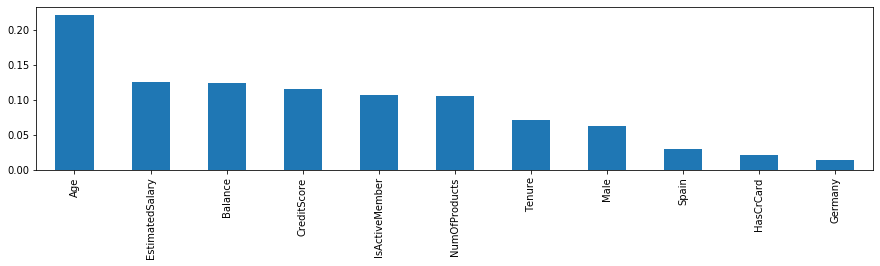

In [61]:
plt.figure(figsize=(15,3))
importances.plot(kind='bar')
plt.show()

## Implement Logistics regression.

In [62]:
model = LogisticRegression(random_state=42,max_iter=100)
model.fit(x_train_res,y_train_res)
y_predict= model.predict(x_test)
print('Accuarcy of the model :-',accuracy_score(y_test,y_predict))

Accuarcy of the model :- 0.645


   - We have very less amount of accuarcy as compare to the RandomForestClassifier after the train the model on logistics regression.

### Implement Lasso Regression.

In [63]:
model = LogisticRegression(penalty='l1',C=0.1,random_state=42,max_iter=100,solver='liblinear')
model.fit(x_train_res,y_train_res)
y_predict= model.predict(x_test)
print('Accuarcy of the model :-',accuracy_score(y_test,y_predict))

Accuarcy of the model :- 0.728


In [64]:
train_accuaracy = round(model.score(x_train_res,y_train_res)*100,1)
test_accuracy   = round(model.score(x_test,y_test)*100,1)

In [65]:
train_accuaracy,test_accuracy

(77.8, 72.8)

#### Create an ROC-AUC curve

In [66]:
from sklearn.metrics import roc_curve,auc

In [67]:
preds = model.predict_proba(x_test)[:,1]

In [68]:
fpr,tpr,thresh=roc_curve(y_test,preds)

In [69]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [70]:
auc = round(auc(fpr,tpr),2)

In [91]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,geom_abline,geom_area,ggtitle,geom_line
from plotnine.data import mtcars

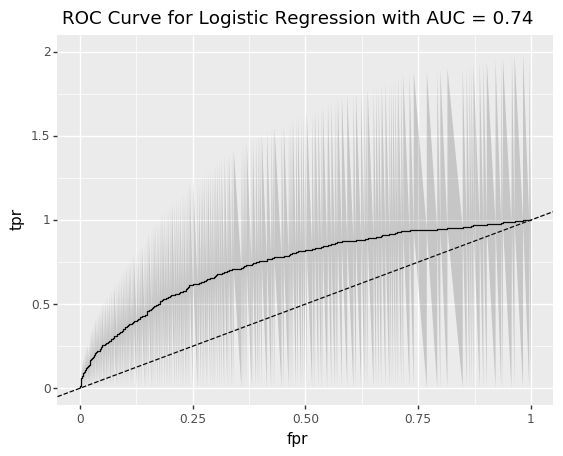

<ggplot: (32541413)>

In [93]:
ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Logistic Regression with AUC = %s" % str(auc))

#### Cross validated the model.

In [113]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_predict

In [114]:
predicted = cross_val_predict(LogisticRegression(),x,y,cv=10)

In [115]:
logistics_cv_score = round(accuracy_score(y,predicted)*100,1)

In [116]:
logistics_cv_score

79.0

#### Confusion Metrics for Lasso.

In [117]:
mat = confusion_matrix(y_test,y_predict)
mat

array([[1216,  377],
       [ 167,  240]], dtype=int64)

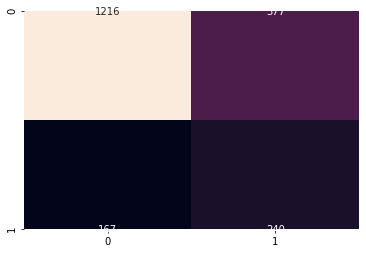

In [119]:
sns.heatmap(mat,annot=True,fmt='d',cbar=False)
plt.show()

#### Confusion matrix for the RandomForestClassifier.

In [120]:
matt = confusion_matrix(y_test,Y_pred)
matt

array([[1371,  222],
       [ 144,  263]], dtype=int64)

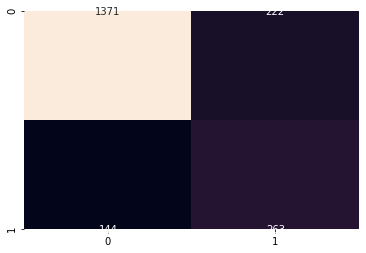

In [122]:
sns.heatmap(matt,annot=True,fmt='d',cbar=False)
plt.show()

In [124]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.54      0.65      0.59       407

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000

